# Assignment 2

Student name : Balasubramanian A.R

Batch : M.Sc Computer science 2nd year

In this assignment we analyze two image based datasets using techniques from unsupervised learning. Specifically, we use k-Means clustering along with principal component analysis (PCA) and t-SNE to analyze the structure of these datasets.

# Olivetti Faces dataset

We consider the Olivetti faces dataset given in sklearn. The dataset consists of $400$ images. Each image is the face a person and the dataset consists of faces of $40$ different people (a total of $10$ image per person). Each image has dimensions $64 \times 64$. The target for each image is the id of the person corresponding to the image (a number from $0$ to $39$). 

## Clustering with 40 clusters

In this section, we try running k-Means, k-Means with PCA and t-SNE to cluster the data into 40 different groups. Intuitively we want each cluster to denote one class. For each element in a cluster we assign it a label equal to the mode of all the labels in that cluster.

In [2]:
import sklearn
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
faces = sklearn.datasets.fetch_olivetti_faces() #Fetching data

In [3]:
data = faces.data
target = faces.target
groups = 40 #Number of clusters

#For displaying images
import seaborn as sns
sns.set_style("darkgrid", {"axes.facecolor": ".95"})
%config InlineBackend.figure_format = 'svg'

#Sample image
import matplotlib
matplotlib.rcParams['figure.figsize'] = (5.0, 5.0)
matplotlib.pyplot.imshow(data[0].reshape(64,64))

In [46]:
#k-Means
from sklearn.cluster import KMeans
from scipy.stats import mode
from sklearn.metrics import accuracy_score

kmeans = KMeans(n_clusters=groups, random_state=10)
clusters = kmeans.fit_predict(data)

#Assigning the mode of a cluster as the classification for all elements in that cluster
labels = np.zeros_like(clusters)
for i in range(groups):
    mask = (clusters == i)
    labels[mask] = mode(target[mask])[0]
    
#Accuracy score
accuracy_score(target, labels)

0.605

In [47]:
#k-Means with PCA of 100 components
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

pca = PCA(n_components = 100)
prin_comp = pca.fit_transform(scaled_data)
pca_data = pd.DataFrame(data = prin_comp)

pca_clusters = kmeans.fit_predict(pca_data)

pca_labels = np.zeros_like(pca_clusters)
for i in range(groups):
    mask = (pca_clusters == i)
    pca_labels[mask] = mode(target[mask])[0]

accuracy_score(target, pca_labels)

0.6575

In [48]:
#t-SNE in 2 dimensions
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init='random', random_state=10)
tsne_data = tsne.fit_transform(data)

tsne_clusters = kmeans.fit_predict(tsne_data)

tsne_labels = np.zeros_like(tsne_clusters)
for i in range(groups):
    mask = (tsne_clusters == i)
    tsne_labels[mask] = mode(target[mask])[0]

accuracy_score(target, tsne_labels)

0.6725

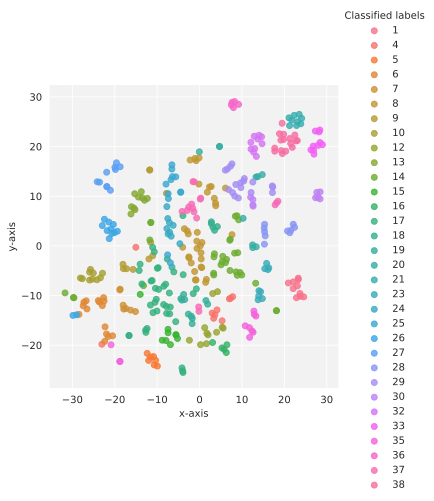

In [49]:
#Plotting t-SNE for the entire dataset. Notice that the dataset contains only 400 images.
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
plot = pd.DataFrame(tsne_data)
plot.columns = ["x-axis","y-axis"]
plot["Classified labels"] = labels #Labels here are the labels assigned by our model to each point
sns.lmplot("x-axis", "y-axis", hue = "Classified labels", data = plot.sample(400) ,fit_reg=False)

## t-SNE analysis of the data

Grouping the data into 40 clusters gives us only a model with roughly 60% accuracy. We will use t-SNE to plot the graph of the data where the points are labelled by their actual labels. 

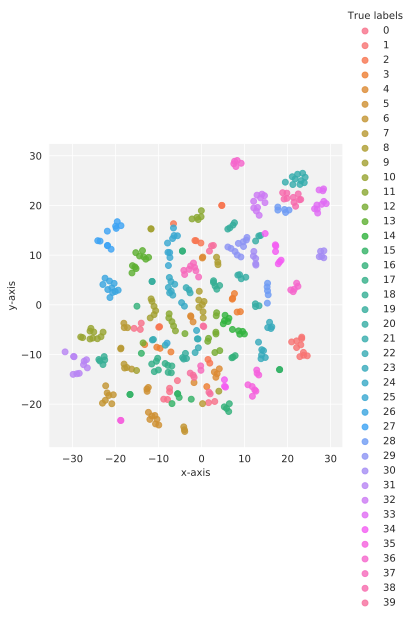

In [50]:
plot = pd.DataFrame(tsne_data)
plot.columns = ["x-axis","y-axis"]
plot["True labels"] = target #The true labels
sns.lmplot("x-axis", "y-axis", hue = "True labels", data = plot.sample(400) ,fit_reg=False)

Upon examining the t-SNE plot for the dataset, we can see that examples of the some classes are not clustered into a single group, but into 2 or 3 separate groups. For example, if we plot only the examples of classes 0 to 9, we get the following picture:

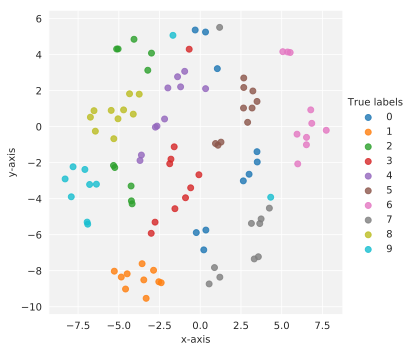

In [51]:
#arr is a boolean array where the ith position is True iff the ith position belongs to classes 0 through 9
arr = [False for i in range(len(target))]
for i in range(len(target)):
    if target[i] >= 0 and target[i] <= 9:
        arr[i] = True

tsne = TSNE(n_components=2, init='random', random_state=10)
tsne_rest = tsne.fit_transform(data[arr]) #Projecting only examples of classes 0 to 9

plot = pd.DataFrame(tsne_rest)
plot.columns = ["x-axis","y-axis"]
plot["True labels"] = target[arr]
sns.lmplot("x-axis", "y-axis", hue = "True labels", data = plot.sample(100) ,fit_reg=False)

## Clustering with 80 clusters

It is clear from the above plot that for some classes the examples belonging to those classes might be far apart and hence might not lie in one cluster. To remedy this situation, we increase the number of clusters permitted to 80 (twice the previous amount) and observe the results.

In [52]:
ngroups = 80
nkmeans = KMeans(n_clusters=ngroups, random_state=10)

In [53]:
#k-Means with PCA of 100 components
npca_clusters = nkmeans.fit_predict(pca_data)

npca_labels = np.zeros_like(npca_clusters)
for i in range(ngroups):
    mask = (npca_clusters == i)
    npca_labels[mask] = mode(target[mask])[0]

print("The accuracy is", accuracy_score(target, npca_labels))

The accuracy is 0.8525


In [54]:
#t-SNE in 2 dimensions
ntsne_clusters = nkmeans.fit_predict(tsne_data)

ntsne_labels = np.zeros_like(ntsne_clusters)
for i in range(ngroups):
    mask = (ntsne_clusters == i)
    ntsne_labels[mask] = mode(target[mask])[0]

print("The accuracy is", accuracy_score(target, ntsne_labels))

The accuracy is 0.8725


We notice that the accuracy has increased by almost 20% by increasing the number of clusters. We give a plot of the new clustering along with a plot of the dataset with the actual target labels.

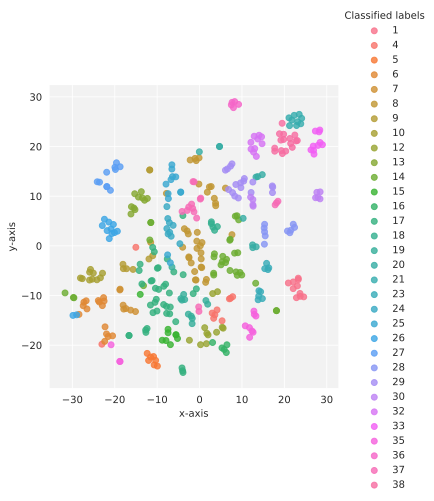

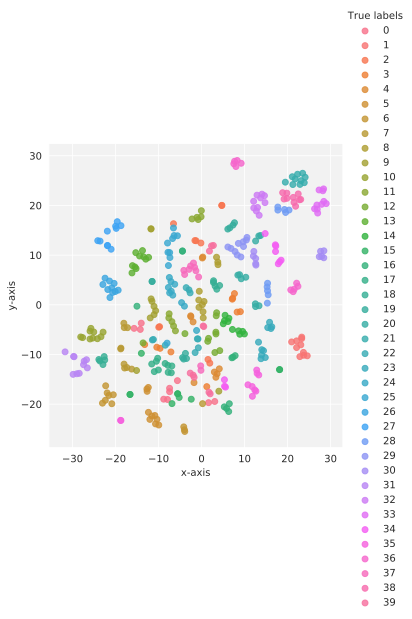

In [55]:
matplotlib.rcParams['figure.figsize'] = (5.0, 5.0)
plot = pd.DataFrame(tsne_data)
plot.columns = ["x-axis","y-axis"]
plot["Classified labels"] = labels #Labels here are the labels assigned by our model to each point
sns.lmplot("x-axis", "y-axis", hue = "Classified labels", data = plot.sample(400) ,fit_reg=False)

plot = pd.DataFrame(tsne_data)
plot.columns = ["x-axis","y-axis"]
plot["True labels"] = target #Labels here are the labels assigned by our model to each point
sns.lmplot("x-axis", "y-axis", hue = "True labels", data = plot.sample(400) ,fit_reg=False)

In [56]:
#Silhouette score
from sklearn import metrics
print("The silhouette score is",metrics.silhouette_score(data, ntsne_labels))

The silhouette score is 0.09696909


# Fashion-MNIST dataset

As a second dataset, we choose the Fashion-MNIST dataset to perform unsupervised learning. 
Firstly, we notice that the Fashion-MNIST dataset consists of $70,000$ examples. For time constraints, we take only the first $10,000$ examples.

In [57]:
from sklearn.datasets import fetch_openml
main = fetch_openml("Fashion-MNIST")

In our first analysis, we try to group the data into $10$ clusters.

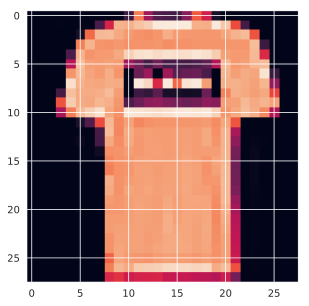

In [58]:
#Taking the first 10,000 examples
mnist_data = main.data[0:10000]
mnist_target = main.target[0:10000]
mnist_target = mnist_target.astype(int)
groups = 10

matplotlib.rcParams['figure.figsize'] = (5.0, 5.0)
matplotlib.pyplot.imshow(mnist_data[1].reshape(28,28))

In [59]:
#k-Means
kmeans = KMeans(n_clusters=groups, random_state=20)
clusters = kmeans.fit_predict(mnist_data)
labels = np.zeros_like(clusters)
for i in range(groups):
    mask = (clusters == i)
    labels[mask] = mode(mnist_target[mask])[0]
accuracy_score(mnist_target, labels)

0.5529

In [60]:
#k-Means with PCA over 100 components

scaled = scaler.fit_transform(mnist_data)
pca = PCA(n_components=100)
prin_comp = pca.fit_transform(scaled)
pca_data = pd.DataFrame(data = prin_comp)

pca_clusters = kmeans.fit_predict(pca_data)
pca_labels = np.zeros_like(pca_clusters)
for i in range(groups):
    mask = (pca_clusters == i)
    pca_labels[mask] = mode(mnist_target[mask])[0]

accuracy_score(mnist_target, pca_labels)

0.554

In [61]:
#t-SNE

tsne = TSNE(n_components=2, init='random', random_state=20)
tsne_data = tsne.fit_transform(mnist_data)

tsne_clusters = kmeans.fit_predict(tsne_data)
tsne_labels = np.zeros_like(tsne_clusters)
for i in range(groups):
    mask = (tsne_clusters == i)
    tsne_labels[mask] = mode(mnist_target[mask])[0]

accuracy_score(mnist_target, tsne_labels)

0.6028

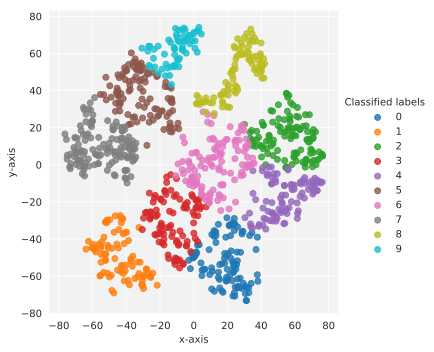

In [62]:
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
plot = pd.DataFrame(tsne_data)
plot.columns = ["x-axis","y-axis"]
plot["Classified labels"] = tsne_labels 
sns.lmplot("x-axis", "y-axis", hue = "Classified labels", data = plot.sample(1000) ,fit_reg=False)

## Clustering with 100 clusters

Clustering with $10$ clusters gave us an accuracy of only roughly $60\%$. Similar to what we did before, we will now increase the number of permitted clusters to $100$.

In [63]:
#t-SNE with 100 clusters

ngroups = 100
nkmeans = KMeans(n_clusters=ngroups, random_state=10)

ntsne_clusters = nkmeans.fit_predict(tsne_data)
ntsne_labels = np.zeros_like(ntsne_clusters)
for i in range(ngroups):
    mask = (ntsne_clusters == i)
    ntsne_labels[mask] = mode(mnist_target[mask])[0]

print("The accuracy is", accuracy_score(mnist_target, ntsne_labels))

The accuracy is 0.7469


In [64]:
#Silhouette score
from sklearn import metrics
print("The silhouette score is",metrics.silhouette_score(mnist_data, ntsne_labels))

The silhouette score is 0.06638510084847409


We plot the new clustering as well as the dataset with the actual target labels.

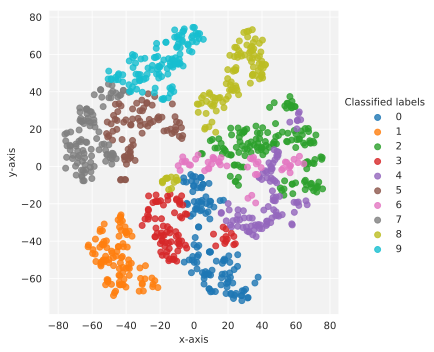

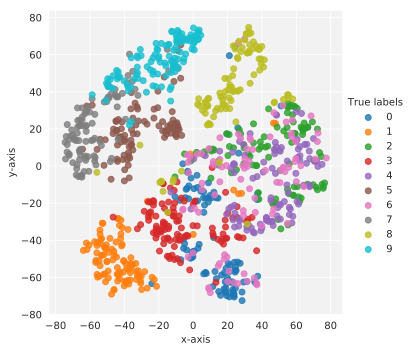

In [65]:
matplotlib.rcParams['figure.figsize'] = (5.0, 5.0)
plot = pd.DataFrame(tsne_data)
plot.columns = ["x-axis","y-axis"]
plot["Classified labels"] = ntsne_labels 
sns.lmplot("x-axis", "y-axis", hue = "Classified labels", data = plot.sample(1000) ,fit_reg=False)

plot = pd.DataFrame(tsne_data)
plot.columns = ["x-axis","y-axis"]
plot["True labels"] = mnist_target
sns.lmplot("x-axis", "y-axis", hue = "True labels", data = plot.sample(1000) ,fit_reg=False)